The Fourier transform and Fourier series are closely related concepts, but they are used in different contexts and have distinct differences:

### Fourier Series:
1. **Application**: The Fourier series is used to represent periodic functions. It decomposes a periodic function into a sum of sine and cosine functions (or complex exponentials) with discrete frequencies.
2. **Representation**: Given a periodic function \( f(t) \) with period \( T \), the Fourier series representation is:

   \begin{equation}
   f(t) = a_0 + \sum_{n=1}^{\infty} \left( a_n \cos\left(\frac{2\pi n t}{T}\right) + b_n \sin\left(\frac{2\pi n t}{T}\right) \right)
   \]
   Or using complex exponentials:
   \[
   f(t) = \sum_{n=-\infty}^{\infty} c_n e^{i 2 \pi n t / T}
   \end{equation}
   
   
3. **Coefficients**: The coefficients \( a_n \), \( b_n \), and \( c_n \) are determined by integrating the function over one period.
4. **Discrete Frequencies**: The frequencies are discrete and are integer multiples of the fundamental frequency \( \frac{1}{T} \).

### Fourier Transform:
1. **Application**: The Fourier transform is used for non-periodic functions or functions defined on the entire real line. It transforms a time-domain signal into its frequency-domain representation.
2. **Representation**: For a non-periodic function \( f(t) \), the Fourier transform \( F(\omega) \) is given by:
   \[
   F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i \omega t} dt
   \]
   The inverse Fourier transform is:
   \[
   f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega) e^{i \omega t} d\omega
   \]
3. **Continuous Frequencies**: The frequencies are continuous and can take any real value.
4. **Frequency Spectrum**: The Fourier transform provides a continuous frequency spectrum of the function.

### Discrete Fourier Transform (DFT) and Fast Fourier Transform (FFT):
1. **Application**: The DFT is used for discrete signals, which are often sampled versions of continuous signals. The FFT is an efficient algorithm to compute the DFT.
2. **Representation**: For a discrete signal \( x[n] \) with \( N \) samples, the DFT is given by:
   \[
   X[k] = \sum_{n=0}^{N-1} x[n] e^{-i \frac{2\pi}{N} kn}
   \]
   The inverse DFT is:
   \[
   x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] e^{i \frac{2\pi}{N} kn}
   \]
3. **Discrete Frequencies**: The frequencies are discrete and depend on the number of samples \( N \).

### Key Differences:
1. **Periodicity**: Fourier series is used for periodic functions, while Fourier transform (and DFT/FFT) is used for non-periodic functions or discrete signals.
2. **Frequency Domain**: Fourier series has discrete frequencies that are integer multiples of the fundamental frequency, while Fourier transform has a continuous frequency spectrum. DFT/FFT, being discrete, also has discrete frequencies but they are not necessarily integer multiples of a fundamental frequency.
3. **Signal Representation**: Fourier series decomposes a periodic signal into a sum of sine and cosine terms, while Fourier transform decomposes a signal into a continuous superposition of sinusoids.

In the context of the provided code:

- **Fourier Series**: The first example uses a Fourier series to approximate a periodic step function by summing a finite number of sine terms.
- **FFT (Discrete Fourier Transform)**: The second example uses the FFT to compute the discrete Fourier transform of a sampled step function, then reconstructs the signal using the inverse FFT with a limited number of terms to approximate the original function. This approach deals with discrete data and is suitable for non-periodic or discrete signals.

Here's a modified version of the previous code to better reflect the use of FFT:


This code showcases how the Fourier transform, specifically the FFT for discrete signals, approximates a step function by reconstructing it from a limited number of frequency components.

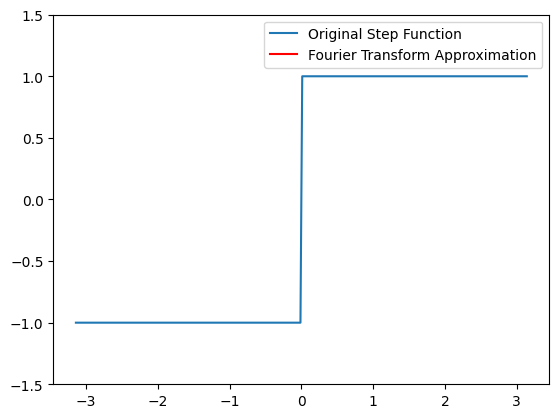

In [1]:


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the step function
def step_function(x):
    return np.where(x < 0, -1, 1)

# Number of sample points
N = 256
# Sample spacing
T = 2 * np.pi / N

# Discrete sample points
x = np.linspace(-np.pi, np.pi, N)
y = step_function(x)

# Fourier transform of the step function
yf = np.fft.fft(y)
xf = np.fft.fftfreq(N, T)

# Setup the plot
fig, ax = plt.subplots()
line, = ax.plot(x, y, label='Original Step Function')
approx_line, = ax.plot([], [], label='Fourier Transform Approximation', color='red')
ax.legend()
ax.set_ylim(-1.5, 1.5)

# Initialize the plot
def init():
    approx_line.set_data([], [])
    return approx_line,

# Update function for animation
def update(n_terms):
    # Reconstruct the signal using inverse FFT with n_terms
    yf_filtered = np.zeros_like(yf)
    yf_filtered[:n_terms] = yf[:n_terms]
    yf_filtered[-n_terms:] = yf[-n_terms:]
    y_approx = np.fft.ifft(yf_filtered)
    approx_line.set_data(x, y_approx.real)
    ax.set_title(f'Fourier Transform Approximation with {n_terms} Terms')
    return approx_line,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=range(1, N//2, 2), init_func=init, blit=True, repeat=False)

# Display the animation
plt.show()
